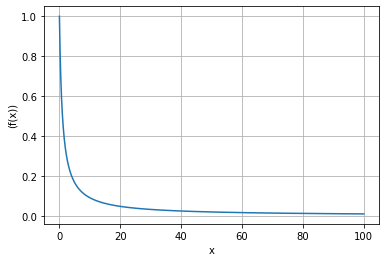

In [1]:
# Пример 1.5.1 
# Элементы простого рисунка 



import math
from matplotlib import pylab as plt
%matplotlib inline

#функция
fun7 = lambda x: 1 / (1 + x)

import numpy as np


x = np.linspace(0, 100, 10000)
plt.plot(x, fun7(x), label='f(x)')

plt.xlabel("x")
plt.ylabel("(f(x))")

plt.grid(True)




In [2]:
from sympy import diff, symbols, cos, sin
x, y = symbols('x y')
print(diff(fun7(x)))

-1/(x + 1)**2


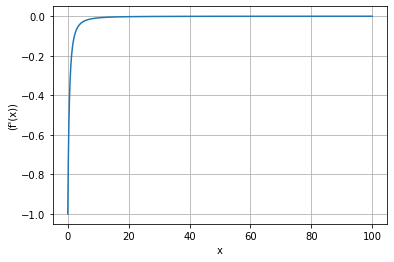

In [3]:

dfun7 = lambda x: -1/(x+1)**2



x = np.linspace(0, 100, 10000)
plt.plot(x, dfun7(x), label='f(x)')

plt.xlabel("x")
plt.ylabel("(f'(x))")

plt.grid(True)



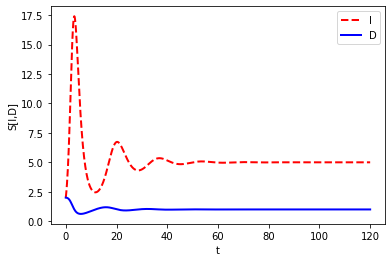

In [21]:
A = 6
I0 = 2
D0 = 2
ts = 10**-9
tp = 20*10**-12
#y = tp/ts
y = 30 * 10**-3
    
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def f(s,t):
    i = s[0]
    d = s[1]
############
    didt = i * (d-1)
############
    dddt = y * (A - d*(1 + i))
    return [didt, dddt]

t = np.linspace(0,120,1000)
s0=[I0, D0]

# использует метод LSODA из библиотеки фортрана
# LSODA — разновидность метода Адамса-Башфорта с настройкой шага с автоматическим определением жесткости
s = odeint(f,s0,t)

plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)

plt.xlabel("t")
plt.ylabel("S[I,D]")
plt.legend(["I","D"])
plt.show()



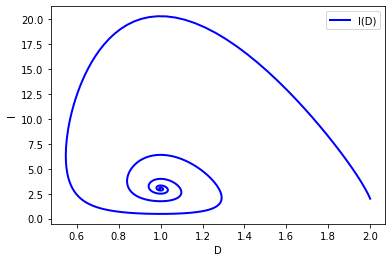

In [5]:
plt.plot(s[:,1],s[:,0],'b-', linewidth=2.0)

plt.xlabel("D")
plt.ylabel("I")
plt.legend(["I(D)"])
plt.show()



In [6]:
print("max")
max1_index = -1
max1_value = -1

for i, lst in enumerate(s[:,0]):
    mx = lst
    if mx>max1_value:
        max1_index = i
        max1_value = mx


print(t[max1_index], max1_value)
print("min")

min1_index = -1
min1_value = 100
for i, lst in enumerate(s[:,0]):
    mx = lst
    if mx<min1_value:
        min1_index = i
        min1_value = mx


print(t[min1_index], min1_value)
print("max")

max2_index = -1
max2_value = -1

for i, lst in enumerate(s[:,0]):
    mx = lst
    if mx>max2_value and i > min1_index:
        max2_index = i
        max2_value = mx


print(t[max2_index], max2_value)
print("min")

min2_index = -1
min2_value = 100

for i, lst in enumerate(s[:,0]):
    mx = lst
    if mx<min2_value and i > max2_index:
        min2_index = i
        min2_value = mx


print(t[min2_index], min2_value)



print("Tmax")
T1 = (t[max2_index] - t[max1_index]) * tp
print(T1)
print(1/T1)
print("Tmin")
T2 = (t[min2_index] - t[min1_index]) * tp
print(T2)
print(1/T2)

max
3.7237237237237237 20.30963346644653
min
17.41741741741742 0.4712208921408534
max
31.83183183183183 6.398656963038492
min
44.68468468468468 1.7437198362993116
Tmax
5.621621621621622e-10
1778846153.8461537
Tmin
5.453453453453452e-10
1833700440.5286348


In [7]:
print((1/T2 + 1/T1) / 2)
print((1/(t[max2_index] - t[max1_index]) + 1/(t[min2_index] - t[min1_index]))/2)

1806273297.1873941
0.03612546594374788


In [8]:
print(10/0.03612546594374788/ 0.05)


5536.260772703288
